In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

C:\Users\quinc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
directory = "../../../OneDrive - HvA/Logfiles/SOLAR/2023/20230615_testvaart_Amstel/0014 - 20230615T131248 3h14m8s 22.186km Duivendrecht"
file_accu = "8_ACCU.csv"
file_master = "1_MASTER.csv"

In [3]:
data_file_accu = lib.DataInladen(f'{directory}/{file_accu}',debug=False)
data_file_master = lib.DataInladen(f'{directory}/{file_master}',debug=False)

In [4]:
data_file_master

,Datalogger port,"Dataloggertijd, in s",Format header (>08|04),NMEA type($GPRMC),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),Snelheid over de grond in km/h,Richting van de snelheid,Datum,Magnetische variatie,Magnetische directie,Mode indicator (A),Data in balancers,Snelheid tenopzichte van het water in km/u
0,1,332.7614,08|04,$GPRMC,111249.0,A,5219.8936,N,453.9587,E,0.0,221.6,150623,NaN,NaN,A,111001011,0.0
1,1,333.7367,08|04,$GPRMC,111250.0,A,5219.8936,N,453.9587,E,0.0,221.6,150623,NaN,NaN,A,111001011,0.0
2,1,334.7538,08|04,$GPRMC,111251.0,A,5219.8936,N,453.9587,E,0.0,221.6,150623,NaN,NaN,A,111001011,0.0
3,1,335.7802,08|04,$GPRMC,111252.0,A,5219.8936,N,453.9587,E,0.0,221.6,150623,NaN,NaN,A,111001011,0.0
4,1,336.7533,08|04,$GPRMC,111253.0,A,5219.8936,N,453.9587,E,0.0,221.6,150623,NaN,NaN,A,111001011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,1,11975.8896,08|04,$GPRMC,142652.0,A,5219.9052,N,453.9402,E,0.0,1.9,150623,NaN,NaN,D,111001011,0.0
11644,1,11976.8664,08|04,$GPRMC,142653.0,A,5219.9052,N,453.9402,E,0.0,1.9,150623,NaN,NaN,D,111001011,0.0
11645,1,11977.8414,08|04,$GPRMC,142654.0,A,5219.9052,N,453.9402,E,0.0,1.9,150623,NaN,NaN,D,111001011,0.0
11646,1,11978.8763,08|04,$GPRMC,142655.0,A,5219.9052,N,453.9402,E,0.0,1.9,150623,NaN,NaN,D,111001011,0.0


In [5]:
# Apply the function using the correct time columns
merged_df = lib.resample_and_merge(data_file_master, data_file_accu, freq='1s')

merged_df

,Datalogger port_x,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum_x,Magnetische variatie,Magnetische directie,Data in balancers,...,Charge 3 spanning,Charge 3 stroom,Charge 4 spanning,Charge 4 stroom,Charge 5 spanning,Charge 5 stroom,Discharge 0 spanning,Discharge 0 stroom,Discharge 1 spanning,"I’m, welke accu ben ik"
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:05:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:33,1.0,111249.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:34,1.0,111250.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:35,1.0,111251.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:36,1.0,111252.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.073000,0.4,0.016000,0.4,0.013000,58.9,0.098000,30.5,0.205000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 03:19:36,1.0,142652.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.017875,0.4,0.016125,0.4,0.010000,58.4,0.111625,30.2,-0.001500,NaN
0 days 03:19:37,1.0,142653.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.018000,0.4,0.016000,0.4,0.010000,58.4,0.114000,30.2,-0.001000,NaN
0 days 03:19:38,1.0,142654.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.019750,0.4,0.015125,0.4,0.011750,58.4,0.119250,30.2,-0.003625,NaN


In [8]:
xas = 'Snelheid over de grond in km/h'
yas = 'Totale accu stroom'
zas = 'Huidige percentage van accu'
# Filtering the data so it's only the laps we want to analyze
# First filter so that the data without GPS data is removed
data_file_filtered = merged_df[merged_df[xas] != 0]
data_file_filtered = merged_df[merged_df[yas] != 0]

# Now filter out the beginning and end of the data, by removing the first and last 10% of the data
from math import ceil
#data_file
#data_file = data_file.iloc[ceil(len(data_file)*0.215):ceil(len(data_file)*0.267)]

# Display the filtered data
data_file_filtered

,Datalogger port_x,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum_x,Magnetische variatie,Magnetische directie,Data in balancers,...,Charge 3 spanning,Charge 3 stroom,Charge 4 spanning,Charge 4 stroom,Charge 5 spanning,Charge 5 stroom,Discharge 0 spanning,Discharge 0 stroom,Discharge 1 spanning,"I’m, welke accu ben ik"
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:05:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:33,1.0,111249.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.072000,0.4,0.016000,0.4,0.013000,58.9,0.096000,30.5,0.202000,NaN
0 days 00:05:34,1.0,111250.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:35,1.0,111251.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.071000,0.4,0.015000,0.4,0.012000,58.9,0.099000,30.5,0.200000,NaN
0 days 00:05:36,1.0,111252.0,5219.8936,453.9587,0.0,221.6,150623.0,NaN,NaN,111001011.0,...,0.073000,0.4,0.016000,0.4,0.013000,58.9,0.098000,30.5,0.205000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 03:19:36,1.0,142652.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.017875,0.4,0.016125,0.4,0.010000,58.4,0.111625,30.2,-0.001500,NaN
0 days 03:19:37,1.0,142653.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.018000,0.4,0.016000,0.4,0.010000,58.4,0.114000,30.2,-0.001000,NaN
0 days 03:19:38,1.0,142654.0,5219.9052,453.9402,0.0,1.9,150623.0,NaN,NaN,111001011.0,...,0.019750,0.4,0.015125,0.4,0.011750,58.4,0.119250,30.2,-0.003625,NaN


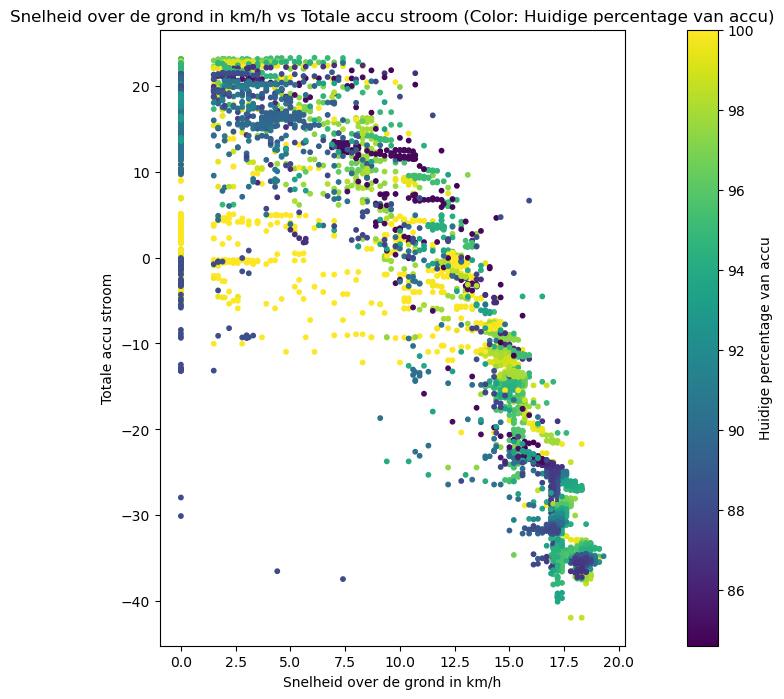

In [9]:
plotten = lib.plot_data(data_file_filtered, xas, yas, zas)